Problem 9 chapter 6 : In this exercise, we will predict the number of applications received
using the other variables in the College data set.

In [92]:
## import statements
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [29]:
## Loading the dataset
filepath = '../../datasets/ISLR/data/csv/'
filename = 'College.csv'
college_df = pd.read_csv(filepath+filename)

# Binarizing the label private and dropping unnamed columns
college_df['Private'].replace(['Yes','No'],[1,0],inplace = True)
college_df = college_df.loc[:, ~college_df.columns.str.contains('^Unnamed')]
college_df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(a) Split the data set into a training set and a test set.

In [34]:
## Splits the data to predict number of apps
y_college = college_df['Apps']
X_college = college_df.drop(['Apps'],axis = 1)

X_college_train, X_college_test, y_college_train, y_college_test = train_test_split(X_college,y_college, test_size =0.2)


(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [35]:
## Fits a linear regression model and calculates mean squared error between predictions and actual using sklearn function
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_college_train,y_college_train)
y_pred = lin_regr.predict(X_college_test)
mse = mean_squared_error(y_college_test,y_pred)
print(mse)

1206823.3421011711


(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [85]:
alphas = np.arange(1,100000,100)

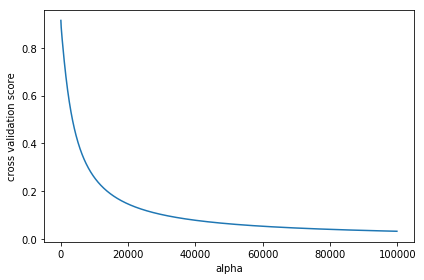

In [86]:
# Scaling the X_train to std and running cross validation score to get best alpha for ridge
scaler = StandardScaler()
X_college_train_std = scaler.fit_transform(X_college_train)
X_college_test_std = scaler.fit_transform(X_college_test)

scores = [cross_val_score(Ridge(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas]
plt.plot(alphas, scores, label = 'ridge')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()

#reg_cv = RidgeCV(alphas = alpha)
#model_cv = reg_cv.fit(X_college_train_std,y_college_train)

In [91]:
## cross validation tells us that our best alpha is around 20000

## The alpha obtained above doesn't seem to be right for some reason because lower values of alpha give lesser error


reg_cv = Ridge(alpha = 20000)
reg_cv.fit(X_college_train_std,y_college_train)
y_pred_1 = reg_cv.predict(X_college_test_std)

mse_1 = mean_squared_error(y_college_test,y_pred_1)
print(mse_1)



8295538.43565212


(d) Fit a lasso model on the training set, with λ chosen by cross-
validation. Report the test error obtained, along with the num-
ber of non-zero coefficient estimates.

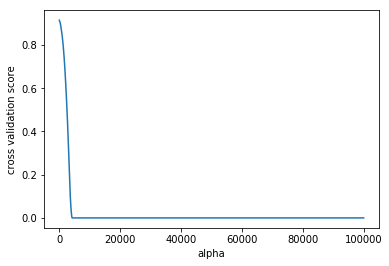

In [93]:
# Scaling the X_train to std and running cross validation score to get best alpha for lasso
# Using the same alphas as above for Ridge
scaler = StandardScaler()
X_college_train_std = scaler.fit_transform(X_college_train)
X_college_test_std = scaler.fit_transform(X_college_test)

scores = [cross_val_score(Lasso(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas]
plt.plot(alphas, scores, label = 'Lasso')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()

(e) Fit a PCR model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

(f) Fit a PLS model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

(g) Comment on the results obtained. How accurately can we pre-
dict the number of college applications received? Is there much
difference among the test errors resulting from these five ap-
proaches?